In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Analisi e Modellazione dei Dati di Qualità dell'Aria

Questo notebook contiene l'analisi dei dati relativi alla qualità dell'aria, inclusi i livelli di CO₂, VOC, la presenza di persone e lo stato di porte e finestre.

## Caricamento e Preparazione dei Dati

In questa sezione, i dati vengono caricati da un file CSV e preparati per l'analisi e la modellazione. Questo include la conversione dei tipi di dati e la gestione dei formati numerici.

In [2]:
data= pd.read_csv("data9.csv", sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    1000 non-null   object
 1   co2     1000 non-null   object
 2   people  1000 non-null   int64 
 3   door    1000 non-null   int64 
 4   window  1000 non-null   int64 
 5   voc     1000 non-null   object
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


## Esplorazione Iniziale dei Dati

Qui vengono visualizzate le informazioni di base sul dataset, come i tipi di dati delle colonne e le prime righe, per avere una prima comprensione della struttura e del contenuto dei dati.

In [4]:
data.head()

,time,co2,people,door,window,voc
0,2024-01-01 00:00:00,"388,5407183284845",0,0,0,"161,81883814641472"
1,2024-01-01 01:00:00,"391,2297719090259",0,0,0,"206,3269118121425"
2,2024-01-01 02:00:00,"406,02265333333776",1,0,0,"232,22856131739377"
3,2024-01-01 03:00:00,"389,32785505451346",0,0,0,"156,31475705315876"
4,2024-01-01 04:00:00,"390,9036241227504",0,0,0,"177,1278635915229"


In [5]:
data['time'] = pd.to_datetime(data['time'])
display(data.dtypes)

,0
time,datetime64[ns]
co2,object
people,int64
door,int64
window,int64
voc,object


## Pulizia e Trasformazione dei Dati

Questa sezione si occupa della pulizia e trasformazione delle colonne rilevanti. In particolare, le colonne 'co2' e 'voc' vengono convertite in formato numerico gestendo il separatore decimale (virgola), e le colonne 'door' e 'window' vengono convertite in tipo categorico per rappresentare stati binari.

In [6]:
# Ensure the data is in a state similar to the initial load if necessary
# Assuming 'data' is already loaded and 'time' is already the index

# Convert 'co2' to numeric float, handling commas
data['co2'] = data['co2'].astype(str).str.replace(',', '.')
data['co2'] = pd.to_numeric(data['co2'])


# Convert 'door' and 'window' to categorical (binary)
data['door'] = data['door'].astype('category')
data['window'] = data['window'].astype('category')

# Convert 'co2' to numeric float, handling commas
data['voc'] = data['voc'].astype(str).str.replace(',', '.')
data['voc'] = pd.to_numeric(data['voc'])

# Display the data types and head to confirm
display(data.dtypes)
display(data.head(20))

,0
time,datetime64[ns]
co2,float64
people,int64
door,category
window,category
voc,float64


,time,co2,people,door,window,voc
0,2024-01-01 00:00:00,388.540718,0,0,0,161.818838
1,2024-01-01 01:00:00,391.229772,0,0,0,206.326912
2,2024-01-01 02:00:00,406.022653,1,0,0,232.228561
3,2024-01-01 03:00:00,389.327855,0,0,0,156.314757
4,2024-01-01 04:00:00,390.903624,0,0,0,177.127864
5,2024-01-01 05:00:00,388.248994,0,0,0,210.283101
6,2024-01-01 06:00:00,405.379950,1,0,0,181.809534
7,2024-01-01 07:00:00,414.871718,2,0,0,242.604840
8,2024-01-01 08:00:00,401.857310,1,0,0,238.996710
9,2024-01-01 09:00:00,391.353334,0,0,0,173.123443


## Visualizzazione delle Serie Temporali

Questa sezione presenta grafici che mostrano l'andamento nel tempo delle variabili chiave: CO₂, il numero di persone, e lo stato della porta. Questi grafici aiutano a identificare pattern, tendenze o anomalie nelle serie storiche.

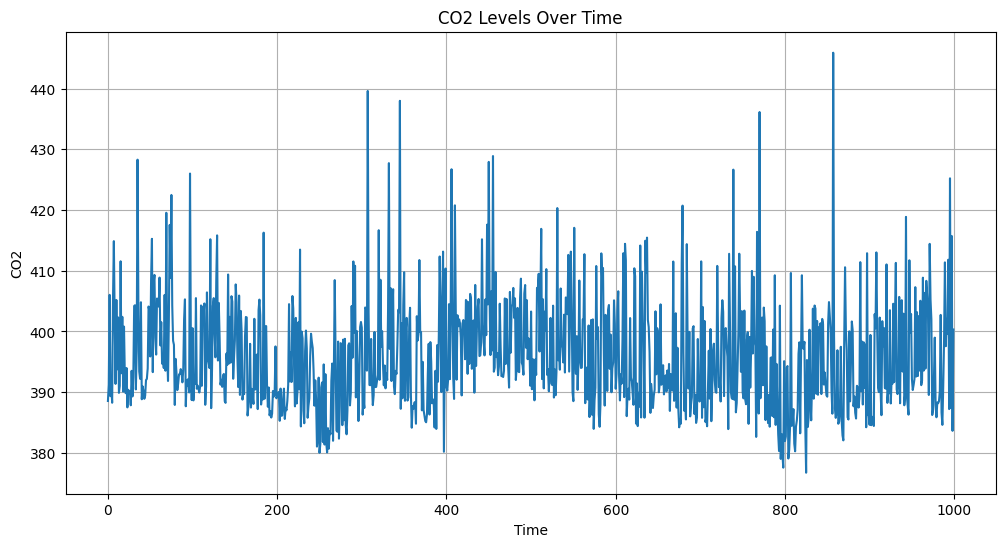

In [8]:
# Plot CO2 over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['co2'])
plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('CO2 Levels Over Time')
plt.grid(True)
plt.show()

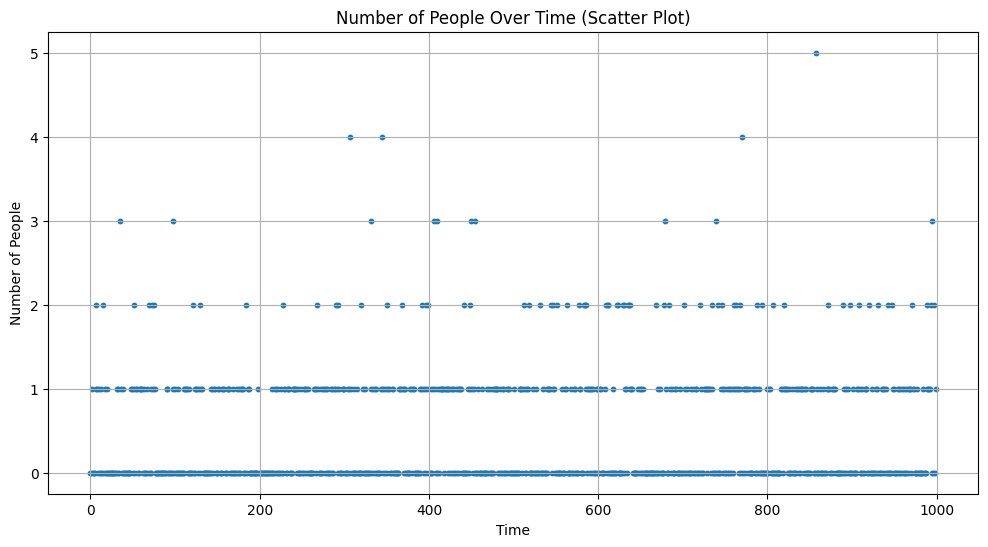

In [9]:
# Plot People over time using a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['people'], s=10) # Using scatter plot with small marker size
plt.xlabel('Time')
plt.ylabel('Number of People')
plt.title('Number of People Over Time (Scatter Plot)')
plt.grid(True)
plt.show()

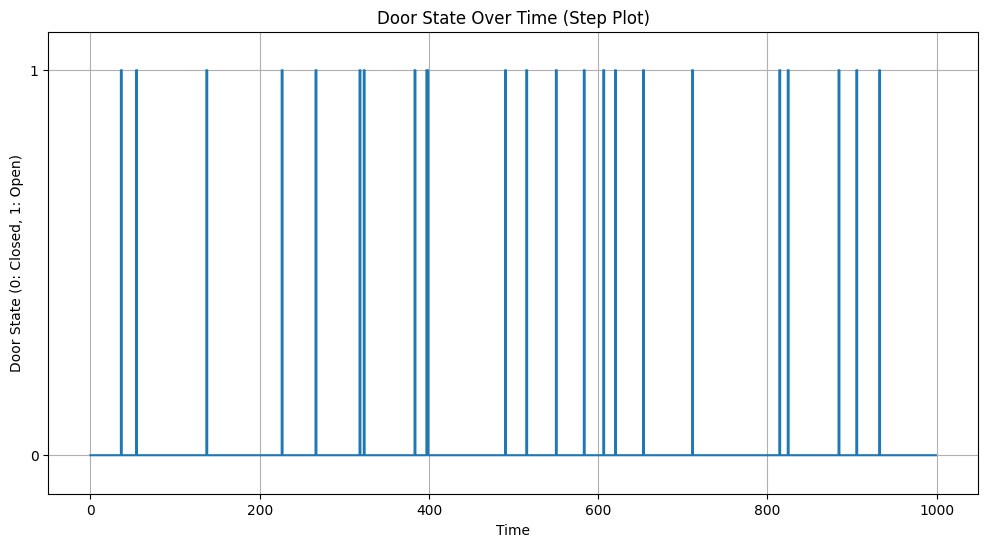

In [10]:
# Plot Door state over time using a step plot
plt.figure(figsize=(12, 6))
plt.step(data.index, data['door'])
plt.xlabel('Time')
plt.ylabel('Door State (0: Closed, 1: Open)')
plt.title('Door State Over Time (Step Plot)')
plt.yticks([0, 1]) # Set y-ticks to only 0 and 1
plt.ylim([-0.1, 1.1]) # Set y-axis limits for better visualization
plt.grid(True)
plt.show()

## Analisi della Relazione tra VOC e CO₂

Viene creato uno scatter plot per visualizzare la relazione tra VOC e CO₂ e viene calcolato il coefficiente di correlazione tra queste due variabili per quantificare la forza e la direzione della loro relazione lineare.

Correlazione VOC–CO₂: 0.80


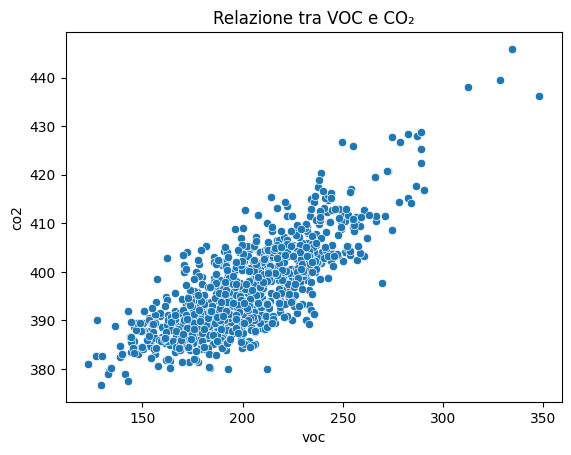

In [11]:


# Scatter plot tra VOC e CO2
sns.scatterplot(x=data['voc'], y=data['co2'])
plt.title('Relazione tra VOC e CO₂')

# Coefficiente di correlazione
corr = data[['voc', 'co2']].corr().iloc[0,1]
print(f"Correlazione VOC–CO₂: {corr:.2f}")

## Pair Plot delle Variabili Numeriche

Un pair plot viene generato per visualizzare le relazioni bivariate tra le variabili numeriche ('co2', 'people', 'voc') e le distribuzioni univariata di ciascuna variabile. Questo aiuta a identificare potenziali correlazioni e distribuzioni.

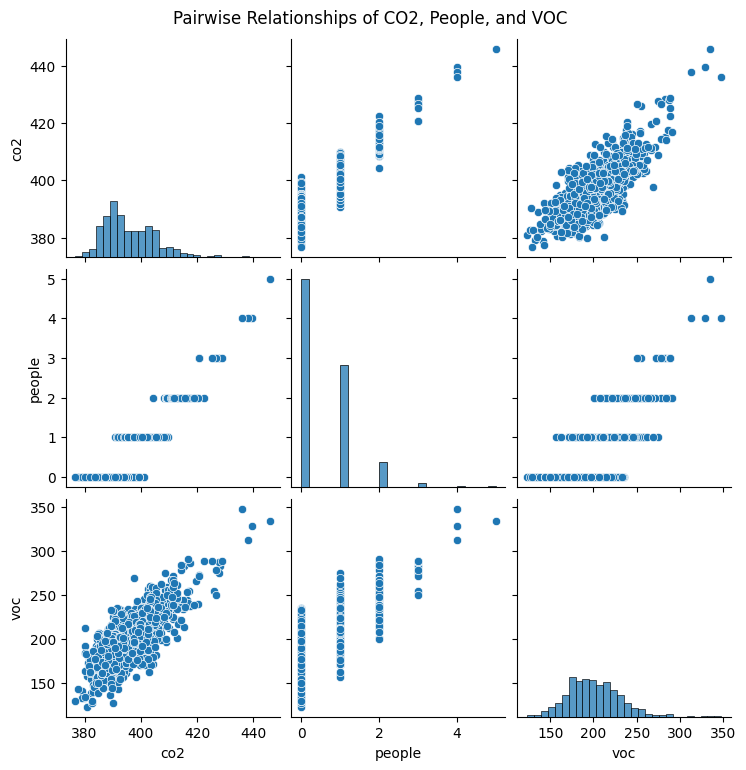

In [12]:
# Select the numerical columns for the pair plot
numerical_cols = ['co2', 'people', 'voc']

# Create a pair plot
sns.pairplot(data[numerical_cols])
plt.suptitle('Pairwise Relationships of CO2, People, and VOC', y=1.02) # Add a title
plt.show()

## Modellazione OLS - Modelli Iniziali

Vengono stimati diversi modelli di regressione OLS  per esplorare la relazione tra CO₂ (variabile dipendente) e diverse combinazioni di variabili esplicative ('people', 'voc', 'door', 'window', e interazioni). I summary dei modelli vengono stampati per valutare la significatività dei predittori e l'adattamento del modello.

In [13]:
# import statsmodels.formula.api as smf
model1 = smf.ols('co2 ~  people  ', data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     4754.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:24:40   Log-Likelihood:                -2757.7
No. Observations:                1000   AIC:                             5519.
Df Residuals:                     998   BIC:                             5529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    389.7856      0.150   2596.826      0.0

In [14]:
# import statsmodels.formula.api as smf

model2 = smf.ols('co2 ~  voc', data=data).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1792.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):          4.89e-225
Time:                        14:24:40   Log-Likelihood:                -3119.4
No. Observations:                1000   AIC:                             6243.
Df Residuals:                     998   BIC:                             6253.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    347.1626      1.165    297.991      0.0

In [15]:
# import statsmodels.formula.api as smf

model3 = smf.ols('co2 ~ people + voc + door:window', data=data).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1371.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:24:40   Log-Likelihood:                -2600.4
No. Observations:                1000   AIC:                             5213.
Df Residuals:                     994   BIC:                             5242.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             372.9208    

In [16]:
# import statsmodels.formula.api as smf

model4 = smf.ols('co2 ~ people + voc', data=data).fit()
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     3399.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:24:40   Log-Likelihood:                -2605.2
No. Observations:                1000   AIC:                             5216.
Df Residuals:                     997   BIC:                             5231.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    372.6027      0.920    404.831      0.0

In [17]:
# import statsmodels.formula.api as smf

model = smf.ols('co2 ~ people + voc + window', data=data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     2280.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:24:40   Log-Likelihood:                -2602.1
No. Observations:                1000   AIC:                             5212.
Df Residuals:                     996   BIC:                             5232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     372.8026      0.921    404.579      

## Analisi dei Residui del Modello OLS (model4)

Dopo aver stimato il `model4` (CO₂ ~ people + voc), i residui di questo modello vengono analizzati per verificare la presenza di autocorrelazione, che indicherebbe che il modello OLS da solo non cattura completamente la struttura temporale dei dati. Vengono mostrati i grafici ACF e PACF dei residui e viene eseguito il test di Ljung-Box.

In [18]:
# Calculate the residuals
residuals = model4.resid


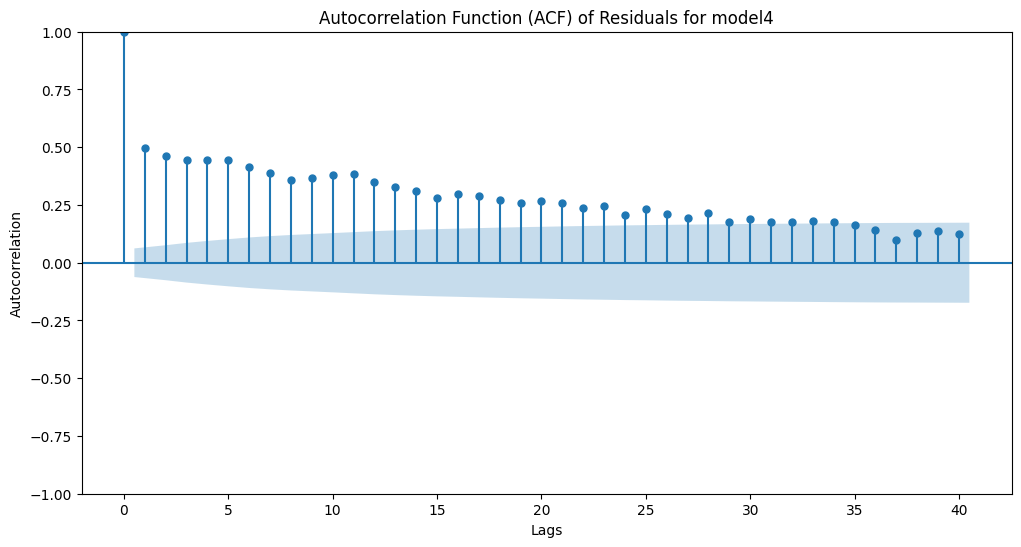

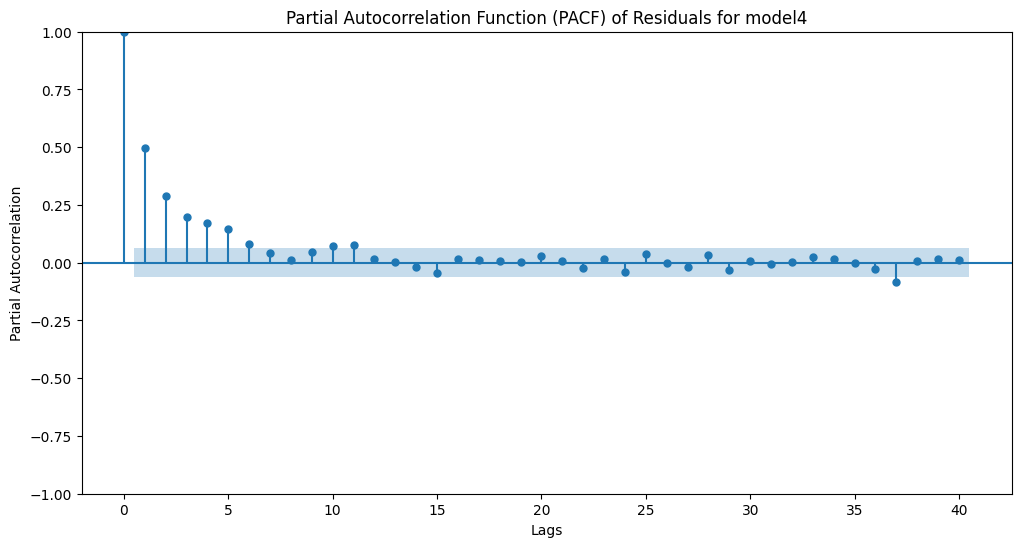

Ljung-Box test for white noise:


,lb_stat,lb_pvalue
10,1796.613327,0.0
20,2748.913461,0.0


In [19]:

# Plot ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Residuals for model4')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF of residuals
plt.figure(figsize=(12, 6))
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of Residuals for model4')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Perform Ljung-Box test for white noise
ljung_box_test = acorr_ljungbox(residuals, lags=[10, 20], return_df=True)
print("Ljung-Box test for white noise:")
display(ljung_box_test)

## Modellazione della Componente AR sui Residui (ARIMA(5,0,0))

Dato che l'analisi dei residui del `model4` ha mostrato autocorrelazione, viene stimato un modello autoregressivo (ARIMA con ordine (5,0,0)) sui residui per catturare la dipendenza temporale rimanente. Il summary del modello AR viene stampato.

In [20]:
# from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(5)
ar5_model = ARIMA(residuals, order=(5, 0, 0))
ar5_results = ar5_model.fit()

# Print the summaryl
print(ar5_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -2374.426
Date:                Wed, 22 Oct 2025   AIC                           4762.852
Time:                        14:24:41   BIC                           4797.207
Sample:                             0   HQIC                          4775.909
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.88e-05      0.403   7.15e-05      1.000      -0.790       0.790
ar.L1          0.2363      0.032      7.363      0.000       0.173       0.299
ar.L2          0.1573      0.033      4.828      0.0

## Analisi dei Residui del Modello AR(5)

I residui del modello AR(5) vengono ulteriormente analizzati utilizzando il test di Ljung-Box per verificare se l'autocorrelazione è stata adeguatamente rimossa.

In [21]:


# Calculate the residuals of the AR(5) model
ar3_residuals = ar5_results.resid

# Perform Ljung-Box test for white noise on the AR(5) residuals
ljung_box_test_ar5 = acorr_ljungbox(ar3_residuals, lags=[10, 20, 30], return_df=True)
print("Ljung-Box test for white noise on AR(5) model residuals:")
display(ljung_box_test_ar5)

Ljung-Box test for white noise on AR(5) model residuals:


,lb_stat,lb_pvalue
10,9.571225,0.478881
20,22.676955,0.304934
30,29.747173,0.478656


## Combinazione del Modello OLS e AR(5)

Questa sezione spiega concettualmente come vengono combinati il modello OLS (`model4`) e il modello AR(5) stimato sui suoi residui per creare un modello ibrido capace di catturare sia le relazioni lineari con i predittori che la dipendenza temporale nei residui. Viene fornita una rappresentazione delle equazioni dei modelli combinati e vengono stampati i coefficienti stimati di entrambi i modelli per riferimento.

In [22]:
# Print coefficients for model4
print("Coefficients for model4 (OLS):")
display(model4.params)

# Print coefficients for ar5_results (ARIMA(5,0,0))
print("\nCoefficients for ar5_results (ARIMA(5,0,0) on residuals):")
display(ar5_results.params)

Coefficients for model4 (OLS):


,0
Intercept,372.602685
people,8.889603
voc,0.093366



Coefficients for ar5_results (ARIMA(3,0,0) on residuals):


,0
const,0.000029
ar.L1,0.236278
ar.L2,0.157306
ar.L3,0.121911
ar.L4,0.132388
ar.L5,0.147955
sigma2,6.754149


## Modello OLS + AR(5)

Il modello stimato è composto da due parti:

**Regressione OLS**

\[
CO₂_t = 372.685 + 8.889603 \cdot people_t + 0.093366 \cdot VOC_t + u_t
\]

**Componente autoregressiva (AR(5)) sui residui**

\[
u_t = 0.000029 + 0.236278u_{t-1} + 0.157306u_{t-2} + 0.121911u_{t-3} + 0.132388u_{t-4} + 0.147955u_{t-5} + \eta_t
\]

dove \( \eta_t \sim N(0, 6.754149) \) è l’errore casuale.

**Forma completa:**

\[
CO₂_t = 372.602685 + 8.889603 \cdot people_t + 0.093366 \cdot VOC_t
       + 0.236278u_{t-1} + 0.157306u_{t-2} + 0.121911u_{t-3}
       + 0.132388u_{t-4} + 0.147955u_{t-5} + \eta_t
\]


## Funzione di Previsione con Modello Combinato

Viene definita una funzione Python per effettuare previsioni utilizzando il modello combinato OLS + AR(5). La funzione prende come input i modelli stimati, i valori dei predittori per il tempo futuro e i residui passati necessari per la componente AR. Viene mostrato un esempio di come utilizzare questa funzione per fare una previsione.

In [23]:
# Function to predict using the combined model
def predict_combined_model(ols_model, ar_results, people_t, voc_t, previous_residuals):
    """
    Predicts CO2 using the combined OLS and AR model.

    Args:
        ols_model: Fitted OLS model (model4).
        ar_results: Fitted AR model on residuals (ar5_results).
        people_t: Value of 'people' at time t.
        voc_t: Value of 'voc' at time t.
        previous_residuals: A list or array of the required lagged residuals
                          (e.g., [u_t-1, u_t-2, u_t-3] for AR(3)).
                          The number of previous residuals needed depends on the AR order.
    Returns:
        Predicted CO2 value at time t.
    """
    # OLS prediction
    ols_prediction = ols_model.predict(pd.DataFrame({'people': [people_t], 'voc': [voc_t]})).iloc[0]

    # AR prediction of the residual
    # The AR model predicts the next residual based on previous residuals
    # The 'const' term from the AR model summary is the intercept for the residual model
    ar_intercept = ar_results.params['const']
    ar_coeffs = ar_results.params[ar_results.params.index.str.startswith('ar.L')]

    # Ensure we have enough previous residuals for the AR model
    if len(previous_residuals) < len(ar_coeffs):
         raise ValueError(f"Need at least {len(ar_coeffs)} previous residuals for AR({len(ar_coeffs)}) model.")

    ar_residual_prediction = ar_intercept
    for i, coef in enumerate(ar_coeffs):
        ar_residual_prediction += coef * previous_residuals[i]


    # Combined prediction
    combined_prediction = ols_prediction + ar_residual_prediction

    return combined_prediction

# --- Example Prediction ---

# Let's use the last available residuals from the data for the AR prediction
# We need the last 5 residuals for the AR(5) model
required_lags = len(ar5_results.params[ar5_results.params.index.str.startswith('ar.L')])
if len(residuals) < required_lags:
    raise ValueError(f"Not enough residuals available ({len(residuals)}) to use {required_lags} lags.")

last_residuals = residuals.tail(required_lags).tolist() # Get the last 'required_lags' residuals

# Define the values for the new prediction at time t
people_t = 3
voc_t = 250

# Make the combined prediction
predicted_co2_combined = predict_combined_model(model4, ar5_results, people_t, voc_t, last_residuals)

print(f"Using the last {required_lags} residuals ({[f'{r:.2f}' for r in last_residuals]}):")
print(f"The combined predicted co2 value for people={people_t} and voc={voc_t} is: {predicted_co2_combined:.2f}")

# Note: For making predictions further into the future, you would need
# to recursively use the predicted residuals as previous residuals for subsequent predictions.

Using the last 5 residuals (['-1.02', '-3.68', '3.29', '-5.50', '0.87']):
The combined predicted co2 value for people=3 and voc=250 is: 421.60


## Valutazione del Modello Combinato (OLS + AR(5))

In questa sezione, vengono calcolati e stampati il Mean Squared Error (MSE) e il Root Mean Squared Error (RMSE) del modello combinato. Queste metriche di valutazione vengono calcolate sui valori *fitted* (i valori previsti dal modello sull'intero dataset di addestramento) per dare un'indicazione dell'errore di adattamento del modello ai dati osservati.

In [24]:
# from sklearn.metrics import mean_squared_error


# Calculate the fitted values from the OLS model (model4)
ols_fitted_values = model4.fittedvalues

# Calculate the fitted values (residuals) from the AR(5) model
ar_fitted_residuals = ar5_results.fittedvalues

# The fitted values of the combined model are the sum of the OLS fitted values and the AR fitted residuals
# Note: The AR fitted values are for the residuals, so adding them to the OLS fitted values
# gives the fitted values for the original series, accounting for the AR structure.
combined_fitted_values = ols_fitted_values + ar_fitted_residuals

# Ensure the lengths match (should be the same as the original data length)
if len(combined_fitted_values) != len(data['co2']):
    raise ValueError("Length of combined fitted values does not match the original data length.")

# Calculate MSE
mse = mean_squared_error(data['co2'], combined_fitted_values)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE) of the combined model: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) of the combined model: {rmse:.2f}")

Mean Squared Error (MSE) of the combined model: 6.76
Root Mean Squared Error (RMSE) of the combined model: 2.60


## Modellazione OLS con Interazione (modello_post_shap)

Viene stimato un nuovo modello OLS (`model_post_shap`) che include un termine di interazione tra 'voc' e 'people' per esplorare se l'effetto di una variabile sulla CO₂ dipende dal livello dell'altra. Il summary del modello viene stampato.

In [25]:
# import statsmodels.formula.api as smf

model_post_shap = smf.ols('co2 ~ people + voc + voc * people', data=data).fit()
print(model_post_shap.summary())

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     2274.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:24:41   Log-Likelihood:                -2603.4
No. Observations:                1000   AIC:                             5215.
Df Residuals:                     996   BIC:                             5234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    371.9193      0.985    377.601      0.0

## Analisi dei Residui del Modello OLS con Interazione

I residui del `model_post_shap` vengono analizzati per la presenza di autocorrelazione, in modo simile a quanto fatto per il `model4`. Vengono mostrati i grafici ACF e PACF dei residui e il risultato del test di Ljung-Box.

In [26]:
# Calculate the residuals
residuals_model_post_shap  = model_post_shap .resid

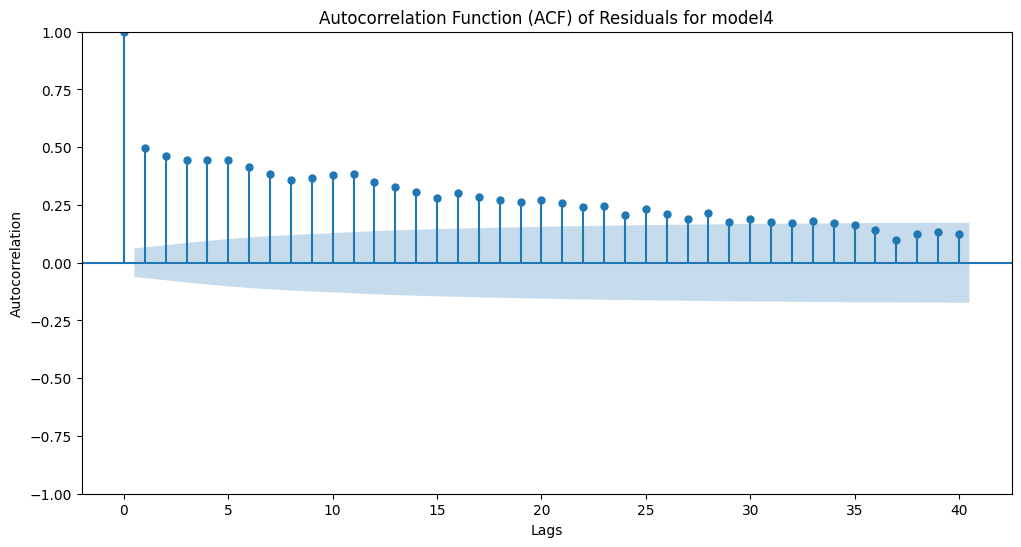

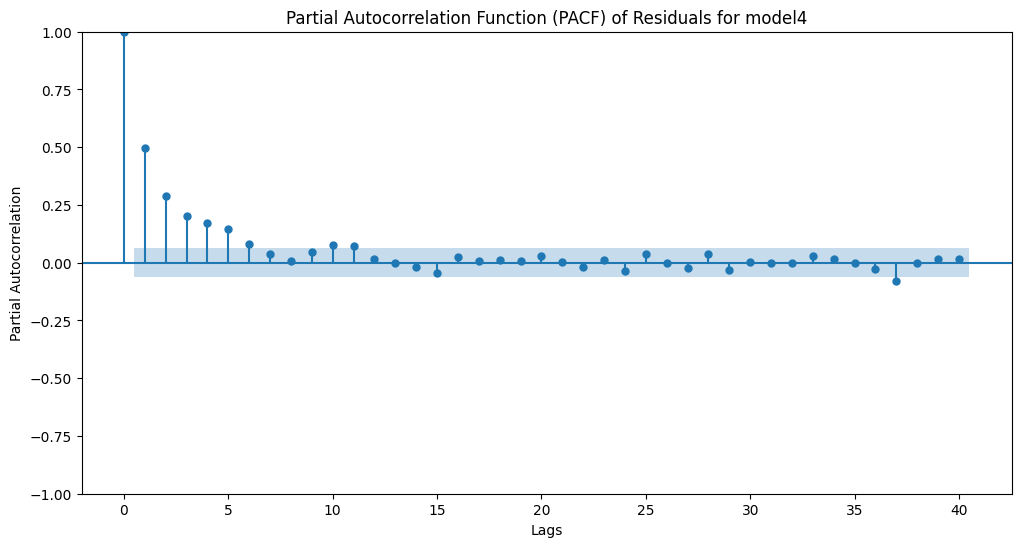

Ljung-Box test for white noise:


,lb_stat,lb_pvalue
10,1800.199367,0.0
20,2750.991488,0.0


In [27]:
# Plot ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals_model_post_shap, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Residuals for model4')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF of residuals
plt.figure(figsize=(12, 6))
plot_pacf(residuals_model_post_shap, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of Residuals for model4')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Perform Ljung-Box test for white noise
ljung_box_test = acorr_ljungbox(residuals_model_post_shap, lags=[10, 20], return_df=True)
print("Ljung-Box test for white noise:")
display(ljung_box_test)

## Modellazione della Componente AR sui Residui del Modello con Interazione (ARIMA(5,0,0))

Viene stimato un modello autoregressivo (ARIMA con ordine (5,0,0)) sui residui del `model_post_shap` per catturare la dipendenza temporale rimanente. Il summary del modello AR viene stampato.

In [28]:

# Fit an AR(5)
ar5_model_post_shap = ARIMA(residuals_model_post_shap, order=(5, 0, 0))
ar5_results_post_shap = ar5_model_post_shap.fit()

# Print the summaryl
print(ar5_results_post_shap.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -2372.124
Date:                Wed, 22 Oct 2025   AIC                           4758.249
Time:                        14:24:42   BIC                           4792.603
Sample:                             0   HQIC                          4771.306
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.614e-05      0.403      0.000      1.000      -0.789       0.789
ar.L1          0.2355      0.032      7.325      0.000       0.172       0.299
ar.L2          0.1582      0.033      4.835      0.0

## Analisi dei Residui del Modello AR(5) (sui residui con interazione)

I residui del modello AR(5) stimato sui residui del `model_post_shap` vengono testati per la presenza di white noise utilizzando il test di Ljung-Box.

In [29]:
# Calculate the residuals of the AR(5) model
ar5_residuals_2 = ar5_results_post_shap.resid

# Perform Ljung-Box test for white noise on the AR(5) residuals
ljung_box_test = acorr_ljungbox(ar5_residuals_2, lags=[10, 20, 30], return_df=True)
print("Ljung-Box test for white noise on AR(5) model residuals:")
display(ljung_box_test)

Ljung-Box test for white noise on AR(5) model residuals:


,lb_stat,lb_pvalue
10,10.415684,0.404811
20,23.495705,0.265115
30,30.678637,0.431326


## Funzione di Previsione con il Nuovo Modello Combinato

Viene definita una funzione Python (`predict_combined_model_v2`) per effettuare previsioni utilizzando il nuovo modello combinato OLS (con interazione) + AR(5). La funzione è simile alla precedente ma tiene conto del termine di interazione nel calcolo della previsione OLS. Viene mostrato un esempio di come utilizzare questa funzione.

In [30]:
# Function to predict using the combined model (model_post_shap + AR(5) residuals)
def predict_combined_model_v2(ols_model, ar_results, people_t, voc_t, previous_residuals):
    """
    Predicts CO2 using the combined OLS (with interaction) and AR(5) model.

    Args:
        ols_model: Fitted OLS model (model_post_shap).
        ar_results: Fitted AR(5) model on residuals (ar5_results_post_shap).
        people_t: Value of 'people' at time t.
        voc_t: Value of 'voc' at time t.
        previous_residuals: A list or array of the required lagged residuals
                          (5 residuals for AR(5)).
    Returns:
        Predicted CO2 value at time t.
    """
    # OLS prediction (includes the interaction term)
    ols_prediction = ols_model.predict(pd.DataFrame({'people': [people_t], 'voc': [voc_t], 'voc:people': [voc_t * people_t]})).iloc[0]

    # AR prediction of the residual
    ar_intercept = ar_results.params['const']
    ar_coeffs = ar_results.params[ar_results.params.index.str.startswith('ar.L')]

    if len(previous_residuals) < len(ar_coeffs):
         raise ValueError(f"Need at least {len(ar_coeffs)} previous residuals for AR({len(ar_coeffs)}) model.")

    ar_residual_prediction = ar_intercept
    for i, coef in enumerate(ar_coeffs):
        ar_residual_prediction += coef * previous_residuals[i]

    # Combined prediction
    combined_prediction = ols_prediction + ar_residual_prediction

    return combined_prediction

# --- Example Prediction ---

# We need the last 5 residuals from model_post_shap for the AR(5) model
required_lags_v2 = len(ar5_results_post_shap.params[ar5_results_post_shap.params.index.str.startswith('ar.L')])
if len(residuals_model_post_shap) < required_lags_v2:
    raise ValueError(f"Not enough residuals available ({len(residuals_model_post_shap)}) to use {required_lags_v2} lags.")

last_residuals_v2 = residuals_model_post_shap.tail(required_lags_v2).tolist() # Get the last 'required_lags_v2' residuals

# Define the values for the new prediction at time t
people_t_v2 = 3
voc_t_v2 = 250

# Make the combined prediction
predicted_co2_combined_v2 = predict_combined_model_v2(model_post_shap, ar5_results_post_shap, people_t_v2, voc_t_v2, last_residuals_v2)

print(f"Using the last {required_lags_v2} residuals ({[f'{r:.2f}' for r in last_residuals_v2]}):")
print(f"The combined predicted co2 value (model_post_shap + AR(5)) for people={people_t_v2} and voc={voc_t_v2} is: {predicted_co2_combined_v2:.2f}")

Using the last 5 residuals (['-0.27', '-3.66', '3.22', '-5.41', '0.65']):
The combined predicted co2 value (model_post_shap + AR(5)) for people=3 and voc=250 is: 421.60


## Valutazione del Nuovo Modello Combinato

Vengono calcolati e stampati il Mean Squared Error (MSE) e il Root Mean Squared Error (RMSE) del nuovo modello combinato (`model_post_shap` + AR(5)). Questo permette di confrontare le performance di adattamento di questo modello rispetto al modello combinato precedente.

In [31]:
# from sklearn.metrics import mean_squared_error
# import numpy as np

# Calculate the fitted values from the OLS model (model_post_shap)
ols_fitted_values_v2 = model_post_shap.fittedvalues

# Calculate the fitted values (residuals) from the AR(5) model on residuals
ar_fitted_residuals_v2 = ar5_results_post_shap.fittedvalues

# The fitted values of the combined model are the sum of the OLS fitted values and the AR fitted residuals
combined_fitted_values_v2 = ols_fitted_values_v2 + ar_fitted_residuals_v2

# Ensure the lengths match
if len(combined_fitted_values_v2) != len(data['co2']):
    raise ValueError("Length of combined fitted values does not match the original data length.")

# Calculate MSE
mse_v2 = mean_squared_error(data['co2'], combined_fitted_values_v2)

# Calculate RMSE
rmse_v2 = np.sqrt(mse_v2)

print(f"Mean Squared Error (MSE) of the new combined model: {mse_v2:.2f}")
print(f"Root Mean Squared Error (RMSE) of the new combined model: {rmse_v2:.2f}")

Mean Squared Error (MSE) of the new combined model: 6.72
Root Mean Squared Error (RMSE) of the new combined model: 2.59


Dal confronto dei due modelli combinati, si osserva quanto segue:

Il Modello Combinato 1 (OLS senza interazione + AR(5)) ha ottenuto un MSE di 6.76 e un RMSE di 2.60 sui valori fitted.
Il Modello Combinato 2 (OLS con interazione voc * people + AR(5)) ha ottenuto un MSE leggermente inferiore di 6.72 e un RMSE di 2.59 sui valori fitted. Il termine di interazione era quasi significativo nell'OLS.
In sintesi, entrambi i modelli combinati si adattano bene ai dati. Il modello che include l'interazione tra VOC e People ha mostrato un leggero miglioramento nelle metriche di errore (MSE e RMSE), suggerendo che l'interazione, sebbene non fortemente significativa, potrebbe contribuire a una migliore previsione. L'aggiunta della componente AR(5) è stata cruciale in entrambi i casi per gestire l'autocorrelazione nei residui OLS.